In [41]:
import numpy as np
n=int(input("Enter the size of the square matrix (n): "))
print(f"Enter the {n}*{n} matrix row by row (Space Aeparated): ")
A=[]
for i in range(n):
    row=list(map(float, input(f"Row {i+1}: ").split()))
    A.append(row)
print(A)

Enter the size of the square matrix (n):  2 


Enter the 2*2 matrix row by row (Space Aeparated): 


Row 1:  2 1
Row 2:  1 2


[[2.0, 1.0], [1.0, 2.0]]


In [4]:
# split()
# Splits the input string into a list of substrings based on spaces.
# "1 2 3".split() → ["1", "2", "3"]
# map(float, ["1", "2", "3"])
# Applies the float() function to each element of the list.
# "1" → 1.0, "2" → 2.0, "3" → 3.0
# Now we get a map object containing [1.0, 2.0, 3.0].
# list(...)
# Converts the map object into a list.
# Final result: [1.0, 2.0, 3.0]

In [42]:
A=np.array(A)
print(A)

[[2. 1.]
 [1. 2.]]


In [43]:
eigenvalues, eignvectors=np.linalg.eig(A)
print(eigenvalues)

[3. 1.]


In [44]:
print(eignvectors)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [45]:
Lambda=np.diag(eigenvalues)
print(Lambda)

[[3. 0.]
 [0. 1.]]


In [46]:
Q=eigenvectors
print(Q)

[[-0.76231552 -0.51853163]
 [ 0.64720557 -0.85505845]]


In [47]:
Q_Lambda=Q.T
print(Q_Lambda)

[[-0.76231552  0.64720557]
 [-0.51853163 -0.85505845]]


In [48]:
A_reconstructed=Q@Lambda@Q_Lambda

In [49]:
print(A_reconstructed)

[[ 2.0122499 -1.0367497]
 [-1.0367497  1.9877501]]


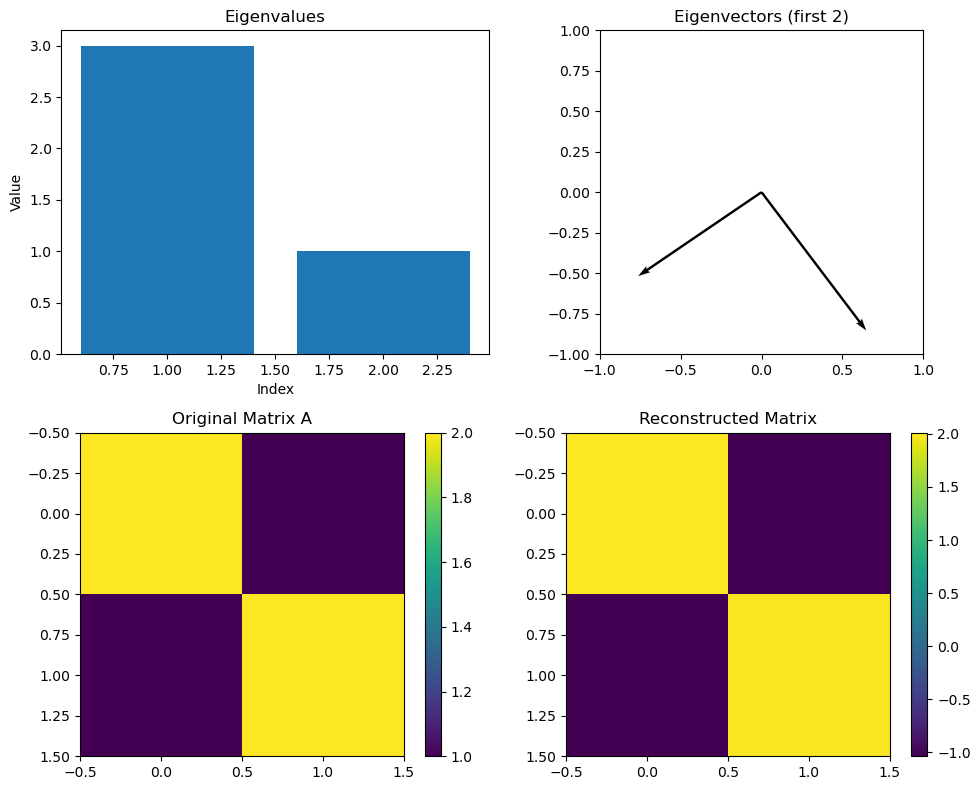

In [51]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Eigenvalues bar chart
axs[0, 0].bar(range(1, len(eigenvalues)+1), eigenvalues.real)
axs[0, 0].set_title("Eigenvalues")
axs[0, 0].set_xlabel("Index")
axs[0, 0].set_ylabel("Value")

# Eigenvectors quiver plot
origin = np.zeros((len(eigenvectors), 2))
axs[0, 1].quiver(*origin.T, eigenvectors[:,0].real, eigenvectors[:,1].real, angles='xy', scale=1, scale_units='xy')
axs[0, 1].set_xlim(-1, 1)
axs[0, 1].set_ylim(-1, 1)
axs[0, 1].set_aspect("equal")
axs[0, 1].set_title("Eigenvectors (first 2)")

#Heatmap of Original Matrix
im1 = axs[1, 0].imshow(A, cmap="viridis")
axs[1, 0].set_title("Original Matrix A")
plt.colorbar(im1, ax=axs[1, 0])

# Heatmap of Reconstructed Matrix
im2 = axs[1, 1].imshow(A_reconstructed.real, cmap="viridis")
axs[1, 1].set_title("Reconstructed Matrix")
plt.colorbar(im2, ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [34]:
# # #Singular Value Decomposition(SVD)
# # #A=U Sumation (V)Transpose
# # U: Orthogonal matrix left singular vectors
# # Σ: Diagonal matrix
# # 𝑉t Orthogonal matrix right singular vectors
# # Left singular vectors (U) → patterns across the rows (height).
# # Right singular vectors (V) → patterns across the columns (width).
# # Singular values (S) → importance (energy) of each pattern.
# # U tells how rows are mixed,
# # V tells how columns are mixed,
# # S tells how strong that pattern is.
# Left singular vectors (U): They multiply from the left of 
# A. They describe row-space patterns.
# Right singular vectors (V): They multiply from the right of 
# A. They describe column-space patterns.

In [35]:
# a=[[1,2],[3,4], [5,6]]
# m=3(row)
# n=2(col)
# p=min(3,2) 2 
import numpy as np
A = np.array([[1,2],[3,4],[5,6]])
U, S, VT = np.linalg.svd(A, full_matrices=False)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)


U shape: (3, 2)
S shape: (2,)
VT shape: (2, 2)


In [8]:
import numpy as np
rows =int(input("Enter the number of rows: "))
cols=int(input("Enter the number of columns: "))
print(f"Enter the {rows}*{cols} matrix row by row (Space Aeparated): ")
A=[]
for i in range(rows):
    row=list(map(float, input(f"Row {i+1}: ").split()))
    if(len(row)!=cols):
        raise ValueError("Number of element dost not match ")
    A.append(row)
A=np.array(A)
print("Original Matrix A: ",A)

Enter the number of rows:  2
Enter the number of columns:  3


Enter the 2*3 matrix row by row (Space Aeparated): 


Row 1:  1 0 1
Row 2:  0 1 1


Original Matrix A:  [[1. 0. 1.]
 [0. 1. 1.]]


In [9]:
U, S, VT=np.linalg.svd(A)

In [10]:
print("\nU (Left singular vectors):\n", U)


U (Left singular vectors):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [11]:
print("\nS (Singular values):\n", S)


S (Singular values):
 [1.73205081 1.        ]


In [12]:
print("\nVT (Right singular vectors):\n", VT)


VT (Right singular vectors):
 [[ 4.08248290e-01  4.08248290e-01  8.16496581e-01]
 [-7.07106781e-01  7.07106781e-01  2.78178085e-16]
 [-5.77350269e-01 -5.77350269e-01  5.77350269e-01]]


In [14]:
Sigma=np.zeros((rows,cols))
for i in range(len(S)):
    Sigma[i,i]=S[i]
print(Sigma)


[[1.73205081 0.         0.        ]
 [0.         1.         0.        ]]


In [15]:
A_reconstruct=U@Sigma@VT
print("Reconstructed Matrix:", A_reconstruct)

Reconstructed Matrix: [[ 1.00000000e+00 -1.33393446e-16  1.00000000e+00]
 [-2.23711432e-17  1.00000000e+00  1.00000000e+00]]


In [19]:
import matplotlib.pyplot as plt


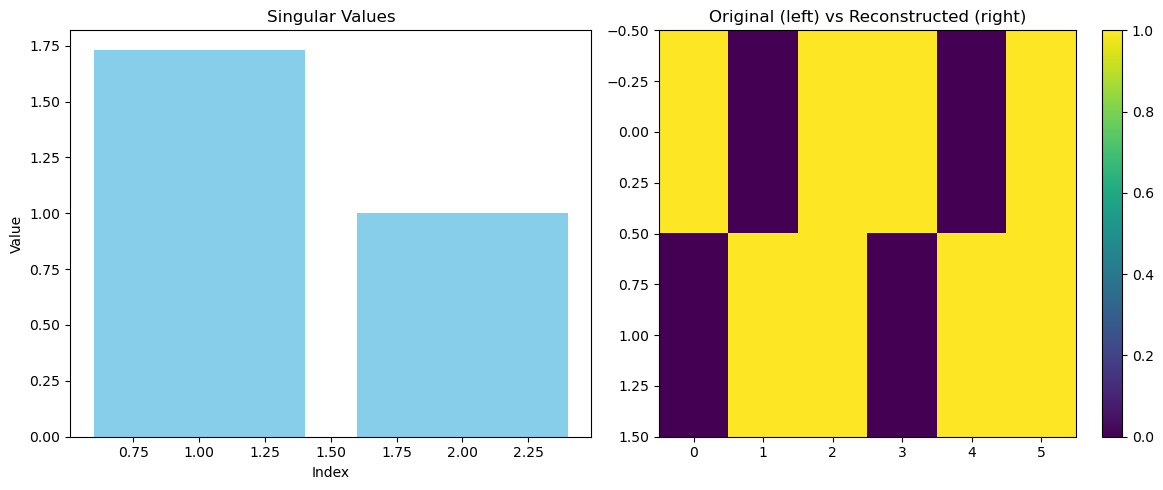

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) #1 row 2 cols  1 meas first subplot select 
plt.bar(range(1,len(S)+1),S,color='skyblue')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.subplot(1,2,2)
plt.imshow(np.hstack([A, A_reconstruct]), cmap="viridis", aspect="auto")
# np.hstack([A, A_reconstructed])horizontally stack
# plt.imshow(...) shows the stacked matrix as an image (heatmap)
# cmap="viridis"color style for values (blue green yellow)
# aspect="auto" auto-adjusts aspect ratio so both matrices fit properly
plt.colorbar()
plt.title("Original (left) vs Reconstructed (right)")
plt.tight_layout()

plt.show()


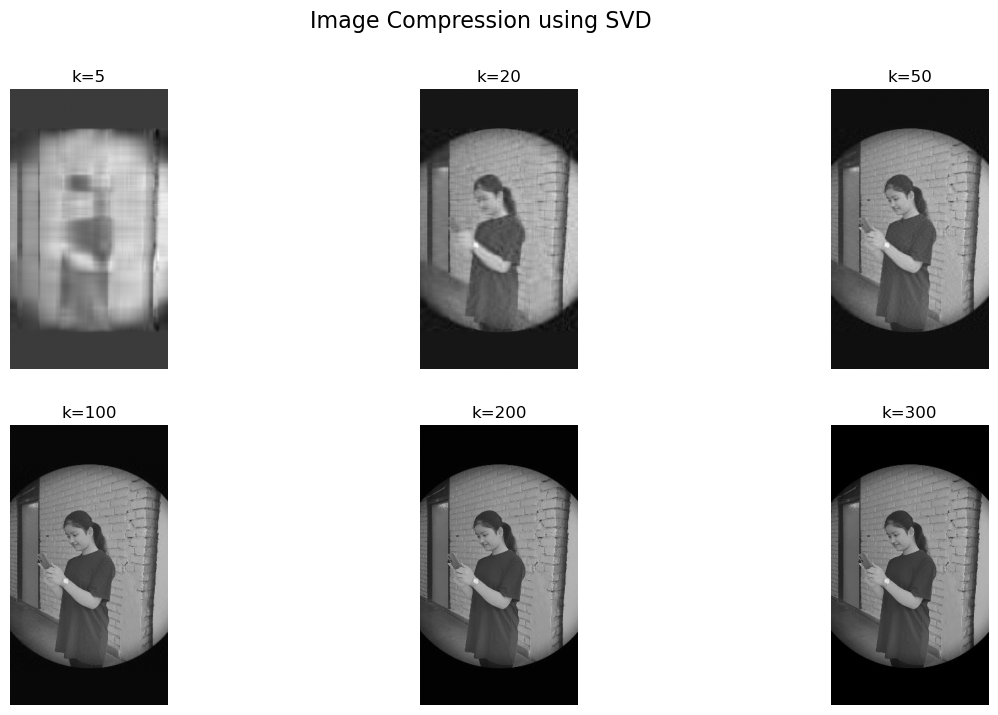

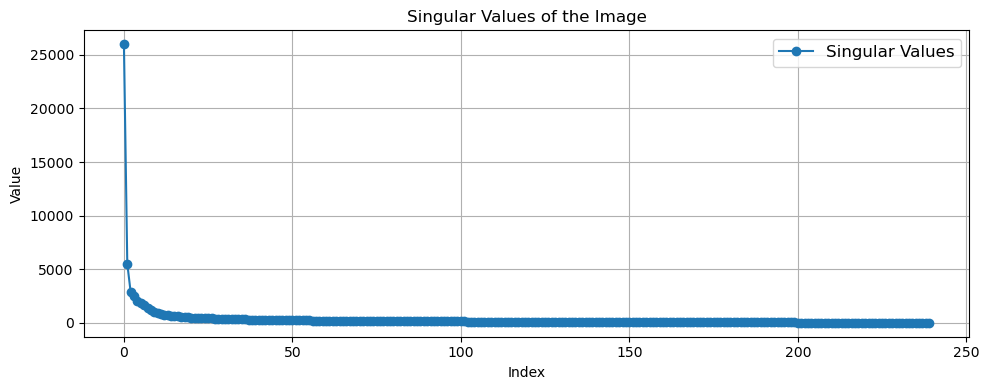

In [59]:
# Suppose take a grayscale image
# Let’s say we use the famous Lenna image (512×512) in grayscale.
# The matrix 
# A will have shape (512, 512)
# After SVD:
# U → (512, 512)
# S → (512,)
# VT → (512, 512)
# For k=5: You’ll see a very blurry outline (the biggest singular values capture the “broad strokes”).
# For k=20: More structure—edges of the face and hat become visible.
# For k=50: Most important details appear, but still slightly soft.
# For k=100: Almost perfect image, small details (like textures) might still be missing.
# For k=200: Very close to original, difference is tiny.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image#The Image module from PIL (Pillow) is used to load, manipulate, and save images in Python.
from tkinter import Tk, filedialog #Use tkinter.Tk and tkinter.filedialog to select an image file interactively.
Tk().withdraw()  # Hides root window to avoid unnecessary display.
image_path=filedialog.askopenfilename(title="Select an image",
                                      filetypes=[("Image files","*.jpg;*.jpeg;*.png;*.bmp;*.tiff")]
                                     )#Opens dialog to select image file (e.g., PNG, JPG).
#filedialog.asksaveasfilename(): Opens dialog to save compressed image.
if not image_path:
    raise ValueError("No file selected!")
#  Load image and convert to grayscale
img=Image.open(image_path).convert("L")
A=np.array(img, dtype=float)
U, S, VT=np.linalg.svd(A, full_matrices=False)#full_matrix=false Returns reduced (economy-sized) matrices
def reconstruct_image(k):
    return U[:,:k]@np.diag(S[:k])@VT[:k,:]
ks=[5,20,50,100,200,300]
plt.figure(figsize=(15,8))
for i, k in enumerate(ks):
    #i: Used to index the subplot position.
    #k: Used to compute the rank-$ k $ approximation of the image.
    #ks = [10, 50, 100], the loop iterates with (i, k) as (0, 10), (1, 50), (2, 100).
    A_K=reconstruct_image(k)
    A_k = np.clip(A_k, 0, 255).astype(np.uint8)#np.clip(array, min, max)limits the values in A_k to the range [0, 255].
    # SVD reconstruction can produce negative values or values exceeding 255 due 
    # to numerical precision or artifacts, especially for 
    # low $ k $ (e.g., $ k = 5 $). Grayscale images require pixel 
    # values in [0, 255] for proper visualization and saving.
#     Purpose of .astype(np.uint8):
# Function: Converts the clipped array to uint8 (unsigned 8-bit integer) data type.
# uint8 ranges from 0 to 255, matching the standard for grayscale image pixels.
    plt.subplot(2, 3, i + 1)
    #plt.subplot(rows, cols, index)
    #len(ks) =5 //2= 2 creating 2X2 grid i+1 position 
    plt.imshow(A_K,cmap='gray')
    plt.title(f"k={k}")
    plt.axis("off")#disables the display of the axes numbers along x- and y-axes

plt.suptitle("Image Compression using SVD", fontsize=16)
plt.show()
plt.figure(figsize=(10,4))
plt.plot(S, "o-", label="Singular Values")
plt.title("Singular Values of the Image")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()
# X-Axis: "Index"Ranges from 0 to approximately 300 (likely up to 512, the minimum dimension of the 512×512 matrix).
#Y-Axis: "Value"   Represents the magnitude of each singular value, which indicates the "importance" or 
# contribution of the corresponding singular vectors to the original image. 
# Compression Rate Calculation:
# Original Size:  m X n = 512 X 512  262,144  elements.
# Compressed Size: Approx.K X (m + n + 1) $. For  k = 50 ,50 X (512 + 512 + 1) = 51,250 
# Ratio: 262,144 / 51,250 approx 5.11  meaning the data is reduced to about 1/5th its original size.